## Введение

Случайный лес — это модель классификации, объединяющая некоторое количество решающих деревьев в одну композицию, за счет чего улучшается их качество работы и обобщающая способность. Деревья строятся независимо друг от друга. Чтобы они отличались друг от друга, обучение проводится не на всей обучающей выборке, а на ее случайном подмножестве. Также, для дальнейшего уменьшения схожести деревьев, оптимальный признак для разбиения выбирается не из всех возможных признаков, а лишь из их случайного подмножества. Прогнозы, выданные деревьями, объединяются в один ответ путем усреднения.

Особенность случайного леса заключается в том, что он не переобучается по мере увеличения количества деревьев в композиции. Это достигается за счет того, что деревья не зависят друг от друга, и поэтому добавление нового дерева в композицию не усложняет модель, а лишь понижает уровень шума в прогнозах.

## Реализация в Scikit-Learn

В библиотеке scikit-learn случайные леса реализованы в классах sklearn.ensemble.RandomForestClassifier (для классификации) и sklearn.ensemble.RandomForestRegressor (для регрессии). Обучение модели производится с помощью функции fit, построение прогнозов — с помощью функции predict. Число деревьев задается с помощью поля класса n_estimators.

Пример использования:

In [1]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
X = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([-3, 1, 10])
clf = RandomForestRegressor(n_estimators=100)
clf.fit(X, y)
predictions = clf.predict(X)
print(predictions)

[-1.51 -0.15  7.23]


Также в этом задании вам понадобится вычислять качество предсказаний на тестовой выборке. Мы будем пользоваться метрикой R2 — по сути, это среднеквадратичная ошибка (RMSE), нормированная на отрезок [0, 1] и обращенная так, чтобы ее наилучшим значением была единица. Ее можно вычислить с помощью функции sklearn.metrics.r2_score. Первым аргументов является список правильных ответов на выборке, вторым — список предсказанных ответов. Пример использования:

In [2]:
from sklearn.metrics import r2_score
print r2_score([10, 11, 12], [9, 11, 12.1])
print r2_score([10, 11, 12], [8, 11, 12.1])

0.495
-1.005


## Инструкция по выполнению

В этом задании вам нужно проследить за изменением качества случайного леса в зависимости от количества деревьев в нем.

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
import matplotlib.pyplot as plt

* Загрузите данные из файла abalone.csv. Это датасет, в котором требуется предсказать возраст ракушки (число колец) по физическим измерениям.
* Преобразуйте признак Sex в числовой: значение F должно перейти в -1, I — в 0, M — в 1. Если вы используете Pandas, то подойдет следующий код: data['Sex'] = data['Sex'].map(lambda x: 1 if x == 'M' else (-1 if x == 'F' else 0))

In [4]:
data = pd.read_csv('data/abalone.csv')
data['Sex'] = data['Sex'].map(lambda x: 1 if x == 'M' else (-1 if x == 'F' else 0))
data.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


* Разделите содержимое файлов на признаки и целевую переменную. В последнем столбце записана целевая переменная, в остальных — признаки.

In [5]:
y = data.loc[:, 'Rings']
X = data.drop('Rings', axis = 1)

* Обучите случайный лес (sklearn.ensemble.RandomForestRegressor) с различным числом деревьев: от 1 до 50 (не забудьте выставить "random_state=1" в конструкторе). Для каждого из вариантов оцените качество работы полученного леса на кросс-валидации по 5 блокам. Используйте параметры "random_state=1" и "shuffle=True" при создании генератора кросс-валидации sklearn.cross_validation.KFold. В качестве меры качества воспользуйтесь долей правильных ответов (sklearn.metrics.r2_score).

In [6]:
scores = []
validator = KFold(y.size, n_folds=5, shuffle=True, random_state=1)
for n_est in range(1, 51):
    clf = RandomForestRegressor(random_state=1, n_estimators=n_est)
    clf.fit(X, y)
    scores.append((
        n_est,
        cross_val_score(clf, X, y = y, cv = validator, scoring=lambda est, X, y: r2_score(y, est.predict(X))).mean()
    ))
print(scores)

[(1, 0.10213869487724367), (2, 0.33841675515802144), (3, 0.40357984946186909), (4, 0.44272239896668103), (5, 0.46402076606749693), (6, 0.47058163275877918), (7, 0.47583061635230062), (8, 0.4817418456255852), (9, 0.4883478130215681), (10, 0.49446412480247826), (11, 0.4933965550001963), (12, 0.49796587639761541), (13, 0.50213646057228534), (14, 0.50642869622573283), (15, 0.50833119704321006), (16, 0.51051314383221469), (17, 0.51384829479930283), (18, 0.51632754127394931), (19, 0.51903468813638798), (20, 0.51867359287238224), (21, 0.51983542335425015), (22, 0.52015835367222107), (23, 0.52101727093662509), (24, 0.52240318258080909), (25, 0.52261746396760711), (26, 0.52380615817170517), (27, 0.52412235221889814), (28, 0.52505374512324399), (29, 0.52597037563489313), (30, 0.52653782166757546), (31, 0.52709985443060225), (32, 0.52838940820927838), (33, 0.52961655612292768), (34, 0.52956395544383794), (35, 0.52951724744047302), (36, 0.5295996267890184), (37, 0.52913141344745995), (38, 0.529160

* Определите, при каком минимальном количестве деревьев случайный лес показывает качество на кросс-валидации выше 0.52. Это количество и будет ответом на задание.
* Обратите внимание на изменение качества по мере роста числа деревьев. Ухудшается ли оно?

In [7]:
print(22)

22


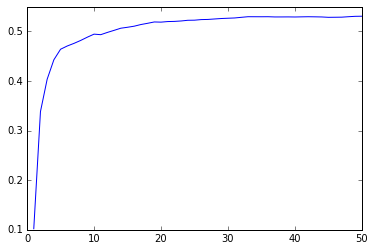

In [8]:
plt.plot([score[0] for score in scores], [score[1] for score in scores])
plt.show()